**Purpose:**
1. Exploring and understanding California Housing Dataset.
2. Implementing a linear regression on the California Housing Dataset.
3. Evaluating linear regression model


In [82]:
##############################
## Step 1: Loading Relevant modules
##############################

## installing relevant packages
#!pip install ydata-profiling

from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

**Reference links used:**
1. [California Housing data from Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing)
2. [To understand Housing data type](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html)

In [ ]:
##############################
## Step 2:Loading Data
##############################
housing = fetch_california_housing()

## Step 2.1: Converting data from matrix to data frame to analyze data better way
feature_names = housing['feature_names']
data = housing['data']
target = housing['target']
df1 = pd.DataFrame(data=data)
df1.rename(columns={0: feature_names[0], 1: feature_names[1], 2: feature_names[2],
                    3: feature_names[3], 4: feature_names[4], 5: feature_names[5],
                    6: feature_names[6], 7: feature_names[7]}, inplace=True)
df2 = pd.DataFrame(data=target)
df2.rename(columns={0: 'Target'}, inplace=True)
housing_df = pd.concat([df1, df2], axis=1)
housing_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [ ]:
##############################
## Step 3:EDA (Exploratory Data Analysis)
##############################

**`Basic Information:`**

California is a state in the Western United States, lying on the American Pacific Coast.
This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surprisingly large values for block groups with few households
and many empty houses, such as vacation resorts.

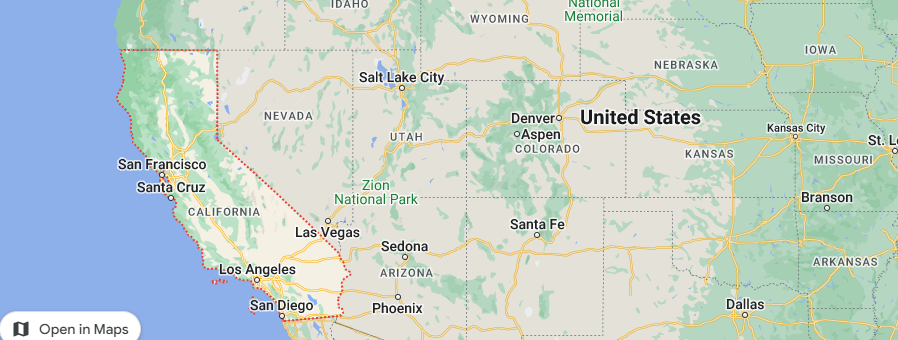


**`Attribute Information:`**

        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude
        - Target        the median house value for California districts,expressed in hundreds of thousands of dollars ($100,000)


**`Entities Involed:`**

  block

**`Data recording Process:`**

  Each row represents an block of California state. As we have total **20640** number of rows, you can imagine that we have broken California state into small **20640 blocks** and has collected infromation about each block like population, median income, geographical location etc.)

**`Capturing Knowledge:`**


In [14]:
housing_profile = ProfileReport(housing_df, title='California Housing Data', html={'style':{'full_width':True}})


In [15]:
housing_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**`Insights:`**

  1. Target is correlated with MedInc
  2. Longitude and Latitude is highly correlated, to remove this multi-colinearity we will remove Longitude and keep Latitude as it is more correlated with Target variable.
  3. AveRooms,AveOccup,AveBedrms are highly skewed feature, we can apply log transformations and check correlation with target variable
  4. Since Target is not highly correlated with HouseAge and Population, we can remove them.
  5. We can observe sudden high spike in number of blocks in Target variable for 5 which shows that California is one of the costly real estate.

  **`Feature Enginnering Options:`**
  1. As observed in maps, all the important cities, are near the coastal area. The distance from coast can be an additional variable derived longitude and latitude can help to improve model accuracy.
  2. Demographic Features:
    a. Population density (calculated from Population)
    b. Average household size (calculated from AveOccup)
    c. Bedroom-to-room ratio (calculated from AveBedrms and AveRooms)
  3. Logarithmic transformation for skewed data like AveOccup,AveBedrms,AveRooms

  


In [88]:
##############################
## Step 4: Data Pre-processing
##############################

housing_df_for_model=pd.DataFrame()
def data_pre_processing(data_for_pre_processing): # will add all the necessary transformation to generate best data for modelling
  global housing_df_for_model
  housing_df_for_model=data_for_pre_processing
  housing_df_for_model=housing_df_for_model.drop(['HouseAge','Population','Longitude'],axis=1)

  housing_df_for_model['AveOccup']=np.log(housing_df_for_model['AveOccup'])
  housing_df_for_model['AveRooms']=np.log(housing_df_for_model['AveRooms'])
  housing_df_for_model['AveBedrms']=np.log(housing_df_for_model['AveBedrms'])
  housing_df_for_model=housing_df_for_model[['MedInc','Target']]




In [86]:
##############################
## Step 5: Model Developement
##############################

def linear_regression_california_housing(data_for_model): # Model training,prediction and evalution
  ## 4.1: Spliting data into train and test
  X_train, X_test, y_train, y_test = train_test_split(data_for_model.loc[:, data_for_model.columns != 'Target'], data_for_model['Target'], random_state=0)

  ## 4.2: Training the model
  LR_pipe = Pipeline([('scaler', StandardScaler()), ('Linear Regression', LinearRegression())])
  LR_pipe.fit(X_train, y_train)

  ## 4.3: Predicting for test
  y_pred=LR_pipe.predict(X_test)

  ## 4.4: Evaluating Model - R2
  l1 = LR_pipe.score(X_train, y_train)

  ## 4.5: Evaluating Model - MSE
  mse = mean_squared_error(y_test, y_pred)

  print("R-square of Linear Regression on training set: {:.3f}".format(l1))
  print("MSE of Linear Regression on test set: {:.3f}".format(mse))

In [89]:
## Calling functions
data_pre_processing(housing_df)
linear_regression_california_housing(housing_df_for_model)



R-square of Linear Regression on training set: 0.481
MSE of Linear Regression on test set: 0.725


In [ ]:
##############################
## Step 6: Summary
##############################

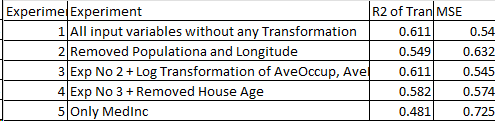